# Impact of Covid-19 on Economic Indicators in the Euro Zone

Authors: Anoushka Jain, Tajaldeep Singh Ahluwalia

## Abstract:

The objective of this report is to assess the impact of the Covid-19 pandemic on economic indicators in the countries of Germany, Greece, Spain, Italy and the Euro Zone. 
The indicators we will be selecting are: Inflation (CPI), Unemployment, GDP per capita, Foreign Direct Investment (FDI).
We will be using the Covid-19 dataset provided by the World Health Organisation and Our World in Data. The variables we shall be focusing on in that will be New cases, New deaths, Human Development Index, Median Age.....
We also aim to predict the economic indicators using Time series forecasting for the following year to see the possible impact of the pandemic.
As part of our analysis we would also explore the trends in the data.

## Introduction:

Inflation:
“Inflation is when you pay fifteen dollars for ten dollar haircut you used to get for five dollars when you had hair .” – Sam Ewing.

Inflation is the phenomenon of an increase in general price levels of goods and services. Consequently, the purchasing power of currency keeps falling. The reasons for inflation vary, ranging from excess money supply to national debt to exchange rates.

There are various types of inflation depending upon the speed it takes. Mild inflation is beneficial for the economy, which leads to an increase in demand and consumption as consumers buy now to beat future prices. An extreme form of inflation is stag inflation, wherein slow economic growth is coupled with  relatively high unemployment and rising inflation. At the other end of the spectrum lies hyperinflation, which is inflation increasing manifold times in a very short span of time. It erodes the real value of currency and causes people to minimize their holdings in that currency and switch to a more stable foreign currency. 

Unemployment:
The term unemployment refers to a situation when a person who is actively searching for employment is unable to find work. Unemployment is considered to be a key measure of the health of the economy. The most frequent measure of unemployment is the unemployment rate, which is the number of unemployed people divided by the number of people in the labor force.

GDP Per Capita:
Gross Domestic Product (GDP) Per capita is measures the economic output of a country per person and is a global measure to gauge the country's prosperity. It is calculated by dividing the GDP of a country by its population. GDP itself is the primary measure of a country's economic productivity. A country's GDP shows the market value of goods and services it produces.

Foreign Direct Investment (FDI):
Foreign direct investments (FDI) are substantial investments made by a company into a foreign concern. Generally, the term is used to describe a business decision to acquire a substantial stake in a foreign business or to buy it outright in order to expand its operations to a new region. It is not usually used to describe a stock investment in a foreign company. The investment may involve acquiring a source of materials, expanding a company's footprint, or developing a multinational presence. Thus it is a very important measure for economic prosperity in a country.

The reason we chose the countries Germany, Greece, Spain, Italy is that they were some of the worst hit countries in the Eurpoean Union during the pandemic. We would also like to do a comparison to the Euro Zone and see if there impact was above or below the average. Through our analysis we would like to see the economic situation in regards to these indicators of these countries.

## Literature Review

In [57]:
## Will add later

## Data Acquisition

##Loading the packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import missingno, os
from scipy.signal import savgol_filter

## Loading the datasets

In [59]:
# Data Sources

# WHO Global Covid Data

who_global = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
who_global.to_csv("raw_data/who_global.csv")

# Consumer Price Index (All items) 

cpi_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CP0000EZ19M086NEST&scale=left&cosd=2016-10-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1996-01-01")
cpi_eur["Country"] = 'EURO' 
cpi_eur.columns.values[1] = "cpi"
cpi_eur.to_csv("raw_data/cpi_eur.csv")

cpi_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DEUCPIALLMINMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_de["Country"] = 'Germany' 
cpi_de.columns.values[1] = "cpi"
cpi_de.to_csv("raw_data/cpi_de.csv")

cpi_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ITACPIALLMINMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_ita["Country"] = 'Italy' 
cpi_ita.columns.values[1] = "cpi"
cpi_ita.to_csv("raw_data/cpi_ita.csv")

cpi_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ESPCPIALLMINMEI&scale=left&cosd=2016-01-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_esp["Country"] = 'Spain' 
cpi_esp.columns.values[1] = "cpi"
cpi_esp.to_csv("raw_data/cpi_esp.csv")

cpi_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GRCCPIALLMINMEI&scale=left&cosd=2016-01-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_grc["Country"] = 'Greece' 
cpi_grc.columns.values[1] = "cpi"
cpi_grc.to_csv("raw_data/cpi_grc.csv")

cpi_fra = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FRACPIALLMINMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1960-01-01")
cpi_fra["Country"] = 'France' 
cpi_fra.columns.values[1] = "cpi"
cpi_fra.to_csv("raw_data/cpi_fra.csv")

# Unemployment Rate (Harmonized, All persons)

unemp_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTEZM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1990-07-01")
unemp_eur["Country"] = 'EURO' 
unemp_eur.columns.values[1] = "unemp"
unemp_eur.to_csv("raw_data/unemp_eur.csv")

unemp_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTDEM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1991-01-01")
unemp_de["Country"] = 'Germany' 
unemp_de.columns.values[1] = "unemp"
unemp_de.to_csv("raw_data/unemp_de.csv")

umemp_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTITM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1983-01-01")
umemp_ita["Country"] = 'Italy' 
umemp_ita.columns.values[1] = "unemp"
umemp_ita.to_csv("raw_data/umemp_ita.csv")

unemp_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTESM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1986-04-01")
unemp_esp["Country"] = 'Spain' 
unemp_esp.columns.values[1] = "unemp"
unemp_esp.to_csv("raw_data/unemp_esp.csv")

unemp_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTGRM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1998-04-01")
unemp_grc["Country"] = 'Greece' 
unemp_grc.columns.values[1] = "unemp"
unemp_grc.to_csv("raw_data/unemp_grc.csv")

unemp_fra = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTFRM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1983-01-01")
unemp_fra["Country"] = 'France' 
unemp_fra.columns.values[1] = "unemp"
unemp_fra.to_csv("raw_data/unemp_fra.csv")

# Normalised GDP 

gdp_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=EA19LORSGPNOSTSAM&scale=left&cosd=2016-05-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-03-01")
gdp_eur["Country"] = 'EURO' 
gdp_eur.columns.values[1] = "gdp"
gdp_eur.to_csv("raw_data/gdp_eur.csv")

gdp_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DEULORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_de["Country"] = 'Germany' 
gdp_de.columns.values[1] = "gdp"
gdp_de.to_csv("raw_data/gdp_de.csv")

gdp_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ITALORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_ita["Country"] = 'Italy' 
gdp_ita.columns.values[1] = "gdp"
gdp_ita.to_csv("raw_data/gdp_ita.csv")

gdp_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ESPLORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_esp["Country"] = 'Spain' 
gdp_esp.columns.values[1] = "gdp"
gdp_esp.to_csv("raw_data/gdp_esp.csv")

gdp_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GRCLORSGPNOSTSAM&scale=left&cosd=2016-05-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_grc["Country"] = 'Greece' 
gdp_grc.columns.values[1] = "gdp"
gdp_grc.to_csv("raw_data/gdp_grc.csv")

gdp_fra = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FRALORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1960-02-01")
gdp_fra["Country"] = 'France' 
gdp_fra.columns.values[1] = "gdp"
gdp_fra.to_csv("raw_data/gdp_fra.csv")

# Production of total industry

prod_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PIEATI01EZM661N&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=2000-01-01")
prod_eur["Country"] = 'EURO' 
prod_eur.columns.values[1] = "Production"
prod_eur.to_csv("raw_data/Production_eur.csv")

prod_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DEUPROINDMISMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1960-01-01")
prod_de["Country"] = 'Germany' 
prod_de.columns.values[1] = "Production"
prod_de.to_csv("raw_data/Production_de.csv")

prod_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ITAPROINDMISMEI&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1960-01-01")
prod_ita["Country"] = 'Italy' 
prod_ita.columns.values[1] = "Production"
prod_ita.to_csv("raw_data/Production_ita.csv")

prod_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ESPPROINDMISMEI&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1965-01-01")
prod_esp["Country"] = 'Spain' 
prod_esp.columns.values[1] = "Production"
prod_esp.to_csv("raw_data/Production_esp.csv")

prod_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GRCPROINDMISMEI&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1962-01-01")
prod_grc["Country"] = 'Greece' 
prod_grc.columns.values[1] = "Production"
prod_grc.to_csv("raw_data/Production_grc.csv")

prod_fra = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FRAPROINDMISMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-12-01&revision_date=2021-12-01&nd=1960-01-01")
prod_fra["Country"] = 'France' 
prod_fra.columns.values[1] = "Production"
prod_fra.to_csv("raw_data/Production_fra.csv")


## Combine Data

In [60]:
# combine the dataset for all countries based on feature

unemp = pd.concat([unemp_eur, unemp_de, umemp_ita, unemp_esp, unemp_grc, unemp_fra], axis=0)
unemp.DATE = pd.to_datetime(unemp.DATE) # convert into a datetime dtype

gdp = pd.concat([gdp_eur, gdp_de, gdp_ita, gdp_esp, gdp_grc, gdp_fra], axis=0)
gdp.DATE = pd.to_datetime(gdp.DATE) # convert into a datetime dtype

cpi = pd.concat([cpi_eur, cpi_de, cpi_ita, cpi_esp, cpi_grc, cpi_fra], axis=0)
cpi.DATE = pd.to_datetime(cpi.DATE) # convert into a datetime dtype

prod = pd.concat([prod_eur, prod_de, prod_ita, prod_esp, prod_grc, prod_fra], axis=0)
prod.DATE = pd.to_datetime(prod.DATE) # convert into a datetime dtype


## Merge/Aggregate Data

In [61]:
who_clean = who_global.copy()

# Truncate the data into a monthly format

who_clean['month'] = pd.to_datetime(who_clean['Date_reported']).dt.month
who_clean['year'] = pd.to_datetime(who_clean['Date_reported']).dt.year

who_clean['DATE'] = pd.to_datetime([f'{y}-{m}-1' for y, m in zip(who_clean.year, who_clean.month)])
who_clean = who_clean[["DATE","Country","WHO_region", "New_cases"]]

# Data aggregation based on monthly data for each country and month
who_clean = who_clean.groupby(["DATE","Country","WHO_region"]).agg({"New_cases":"sum"}).reset_index()

# Slicing the data for only selected country
who = who_clean[who_clean.Country.isin(["Germany", "Italy", "Greece", "Spain", "France"])]

# Creating a dataframe for entire europe covid cases
euro = who_clean.groupby(["DATE","WHO_region"]).agg({"New_cases":"sum"}).reset_index()
euro["Country"] = "EURO"

euro = euro[["DATE", "Country", "WHO_region", "New_cases"]]
euro = euro[euro.WHO_region == "EURO"]
euro

# combine the dataset for selected countries and Europe.

covid = pd.concat([euro, who], axis=0)

covid = covid[["DATE", "Country", "New_cases"]]

## Clean and remove missing values

In [62]:
# Create a final dataset for all countries and features

final_df = pd.merge(covid, unemp, how='outer', on=['DATE', 'Country'])
final_df = pd.merge(final_df, gdp, how='outer', on=['DATE', 'Country'])
final_df = pd.merge(final_df, prod, how='outer', on=['DATE', 'Country'])
final_df = pd.merge(final_df, cpi, how='outer', on=['DATE', 'Country'])

final_df.sort_values(by = ['Country', 'DATE'], ascending = True, inplace=True)

# replace null covid cases with 0
final_df["New_cases"].fillna(0, inplace=True)

# filter the dates with a timeframe
final_df = final_df[(final_df.DATE >= "2016-10-01") & (final_df.DATE <= "2021-05-01") ]


<AxesSubplot:>

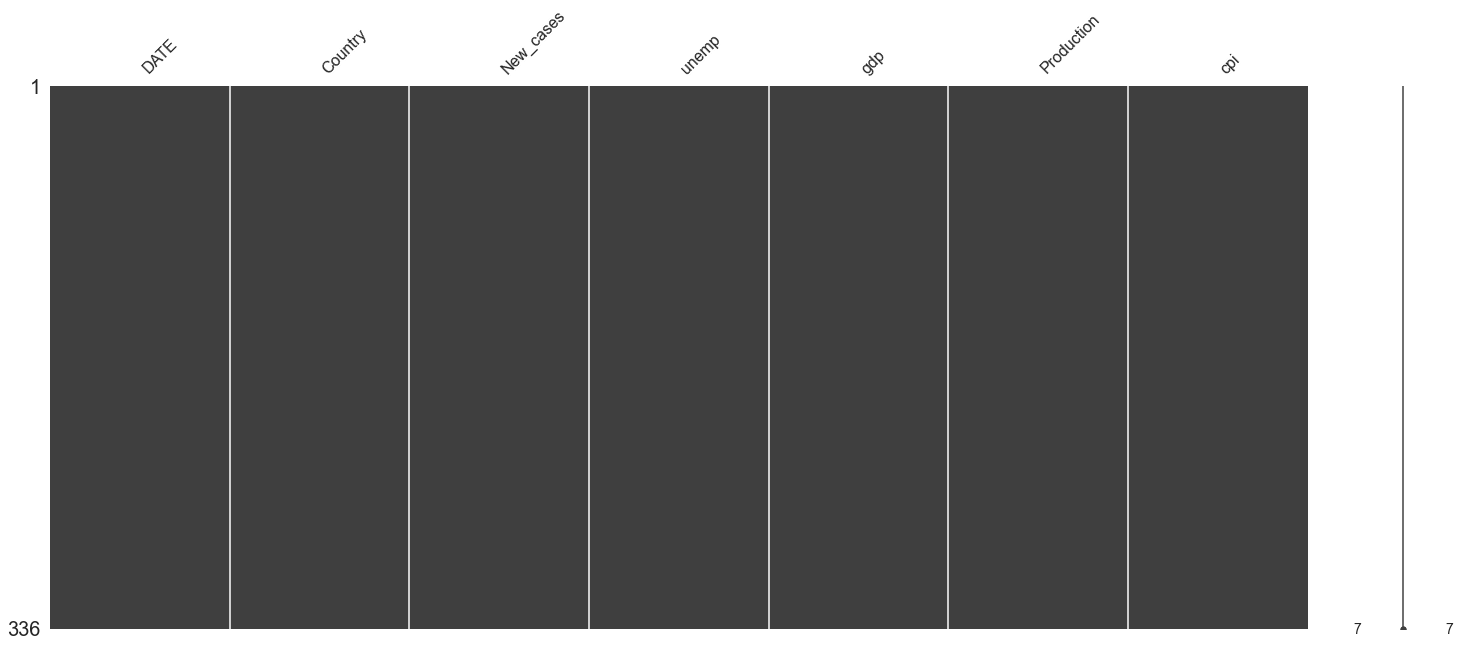

In [63]:
# inspect the dataframe visually
missingno.matrix(final_df)

In [64]:
# get the list of countries to iterate
countries = list(set(final_df['Country'].values.tolist()))
final_df = final_df.set_index("DATE")

## correlation heatmap

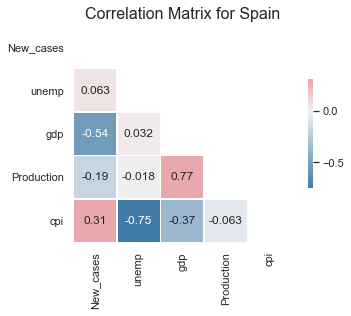

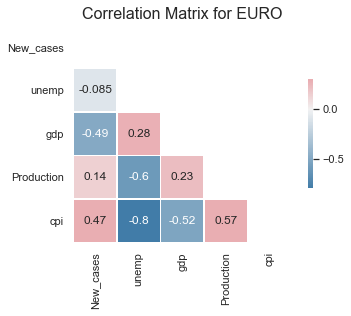

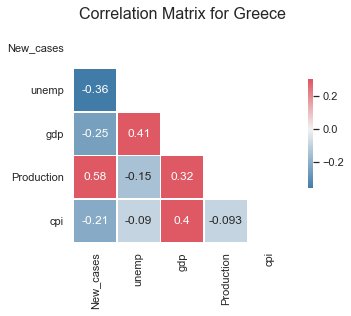

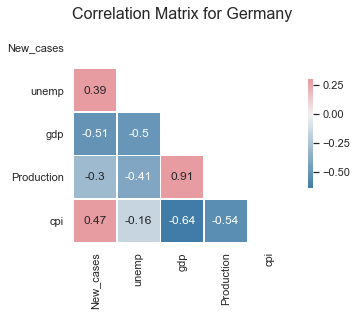

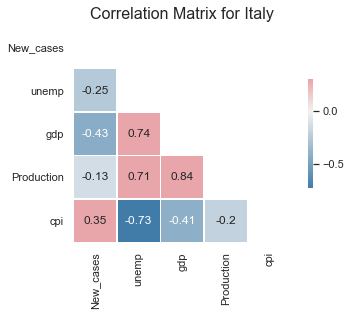

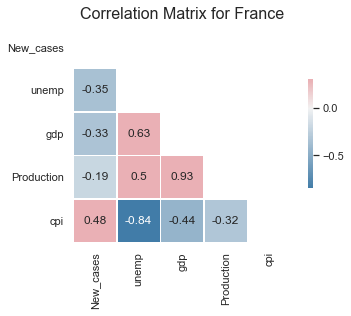

In [66]:
# Define and run a function for plotting the correlation heatmap:
def plot_correlation_matrix(corr_mat, country):
    sns.set(style="white")
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots()
    cmap = sns.diverging_palette(240, 10, n=12, as_cmap=True, center="light")
    sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, annot=True,
                cbar_kws={"shrink": .5}, ax=ax)
    ax.set_title(('Correlation Matrix for ' + country), fontsize=16)
    sns.set(style="darkgrid")


for country in countries:
    corr_mat = final_df[final_df.Country == country].select_dtypes(include='number').corr()
    plot_correlation_matrix(corr_mat, country)

### ARIMA-TimeSeries Analysis

In this case study example, we will learn about time series analysis. Time series analysis and modeling have many business and social applications. It is extensively used to forecast company sales, product demand, stock market trends, agricultural production etc.

The fundamental idea for time series analysis is to decompose the original time series (sales, stock market trends, etc.) into several independent components. Typically, business time series are divided into the following four components:

- Trend – overall direction of the series i.e. upwards, downwards etc.
- Seasonality – monthly or quarterly patterns
- Cycle – long-term business cycles, they usually come after 5 or 7 years
- Irregular remainder – random noise left after extraction of all the components

Interference of these components produces the final series.

### Problem Definition
We will develop an model to forecast CPI for 2021. 

#### Seasonality – Time Series Decomposition

The first thing to do is to see how CPI vary on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

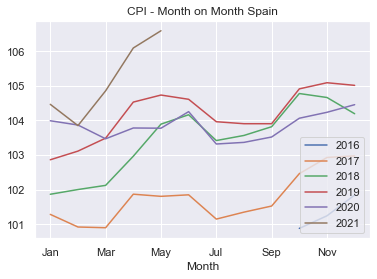

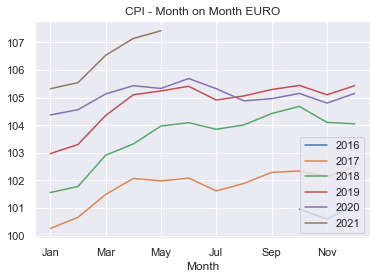

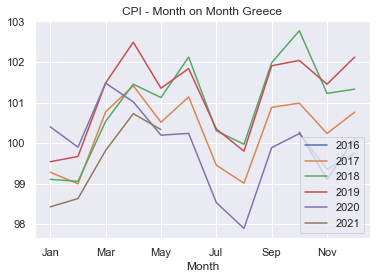

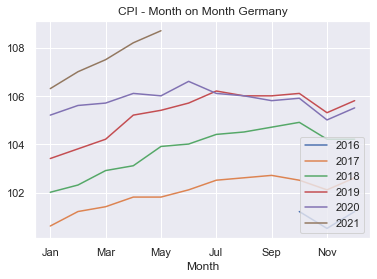

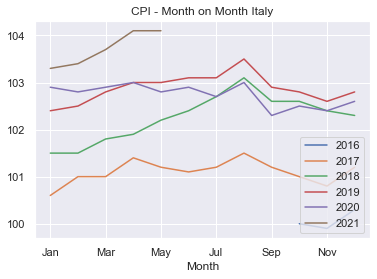

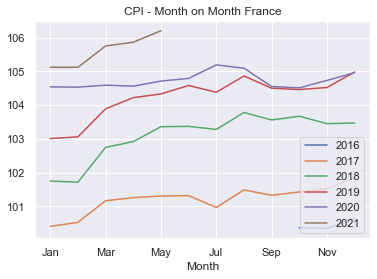

In [67]:
import calendar

for country in countries:
    dates = pd.date_range(start='2016-10-01', freq='MS', periods=len(final_df[final_df.Country == country]))

    seasonal_data = final_df[final_df.Country == country].copy()

    seasonal_data['Month'] = dates.month
    seasonal_data['Month'] = seasonal_data['Month'].apply(lambda x: calendar.month_abbr[x])
    seasonal_data['Year'] = dates.year

    seasonal_data = seasonal_data[['Month', 'Year','cpi']]

    monthly_data = pd.pivot_table(seasonal_data, values = "cpi", columns = "Year", index = "Month")
    monthly_data = monthly_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    monthly_data = monthly_data.iloc[:, :6]
    monthly_data.plot()
    plt.legend(loc ="lower right")
    plt.title(("CPI - Month on Month " + country))
    plt.show()


#### Important Inferences

The CPI has been increasing every year.

### Irregular Remainder – Time Series Decomposition

To decipher underlying patterns, we build a multiplicative time series decomposition model with the following equation:

- Yt=Trendt×Seasonalityt×Remaindert
 
Instead of multiplicative model we could have chosen additive model as well. In that case the equaltion would have been:

- Yt=Trendt+Seasonalityt+Remaindert
 
However, it would have made very little difference in terms of conclusion we will draw from this time series decomposition exercise. Additionally, we are also aware that plain vanilla decomposition models like these are rarely used for forecasting. Their primary purpose is to understand underlying patterns in temporal data to use in more sophisticated analysis like Holt-Winters seasonal method or ARIMA.

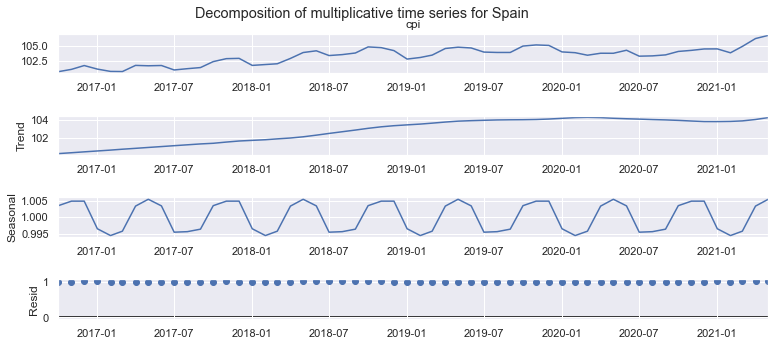

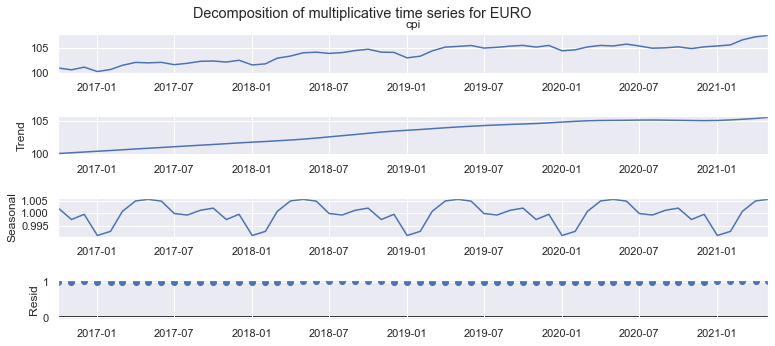

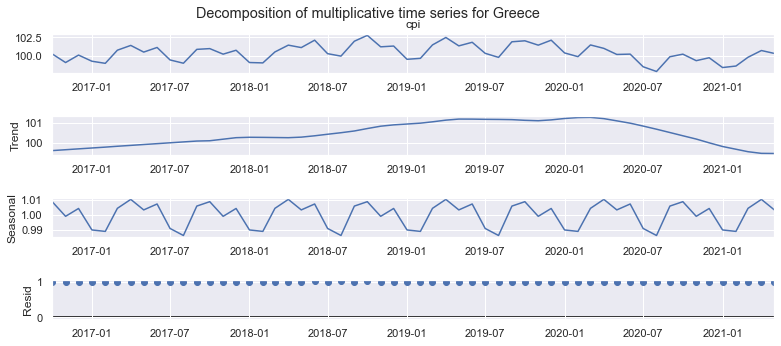

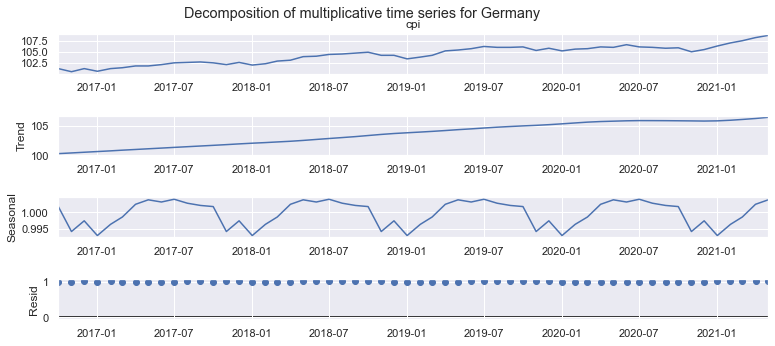

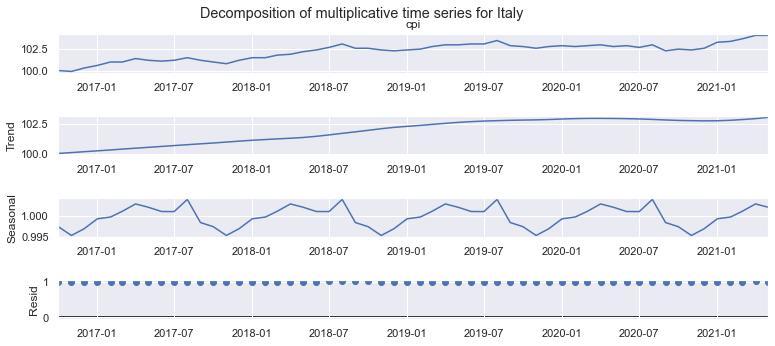

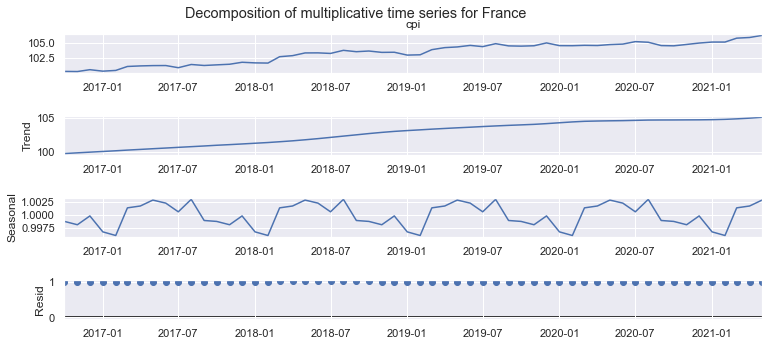

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

for country in countries:
    decomposition = seasonal_decompose(final_df[(final_df.Country == country)]["cpi"], model='multiplicative',two_sided=False, extrapolate_trend=4)

    fig = decomposition.plot()
    fig.set_figwidth(12)
    fig.set_figheight(5)
    fig.suptitle('Decomposition of multiplicative time series for ' + country)
    plt.show()


### Dickey-Fuller Test 
- Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [69]:
#create a user defined function for Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # key, value mapping
        dfoutput['Critical Value (%s)'%key] = value
    # print(dfoutput)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")


# Perform Dickey-Fuller test:
for country in countries:
    print("ADF test for ", country)
    test_stationarity(final_df[final_df.Country == country]['cpi'])


ADF test for  Spain
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  EURO
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  Greece
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  Germany
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  Italy
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  France
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary


In [70]:
# We can take the first difference to make data stationary

# Perform Dickey-Fuller test with first difference:
for country in countries:
    print("ADF test for ", country)
    test_stationarity(final_df[final_df.Country == country]['cpi'].diff(9).dropna())


ADF test for  Spain
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  EURO
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  Greece
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  Germany
Results of Dickey-Fuller Test:
Reject Ho - Time Series is Stationary
ADF test for  Italy
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary
ADF test for  France
Results of Dickey-Fuller Test:
Failed to Reject Ho - Time Series is Non-Stationary


The following are some of our key observations from this analysis:
1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data.
2) Seasonality: seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

- Seasonalityt×Remaindert=YtTrendt

 
3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

- Remaindert=YtTrendt×Seasonalityt
 
The expectations from remainder component is that it should look like a white noise i.e. displays no pattern at all. However, for our series residual display some pattern with high variation on the edges of data.

## Difference data to make data stationary on mean (remove trend)
Clearly the tractor sales has an upward trend for tractors sales and there is also a seasonal component that we have already analyzed.

The next thing to do is to make the series stationary by removing the upward trend through 1st order differencing of the series using the following formula:

1st Differencing (d=1) |  Y′t=Yt−Yt−1

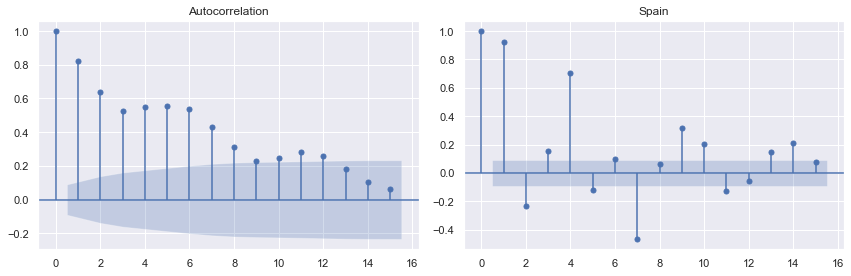

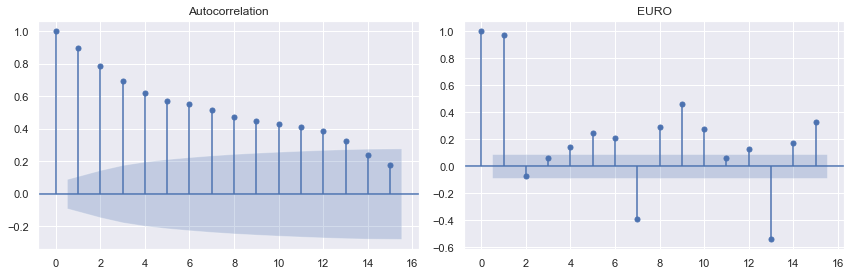

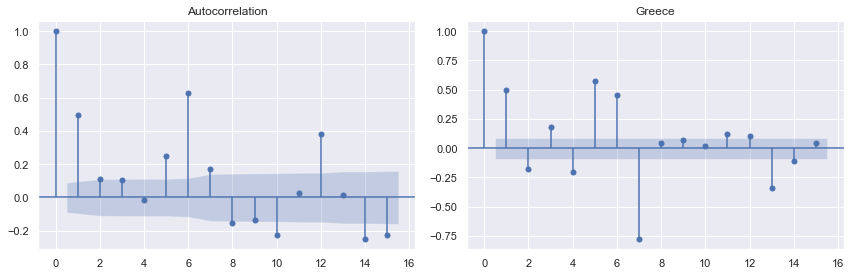

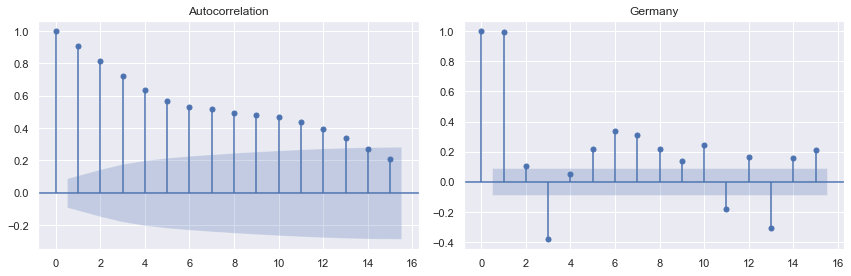

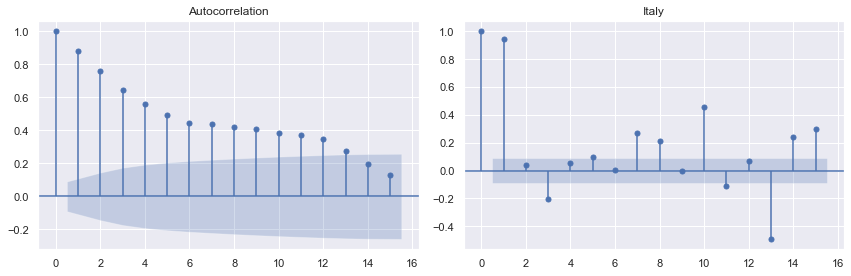

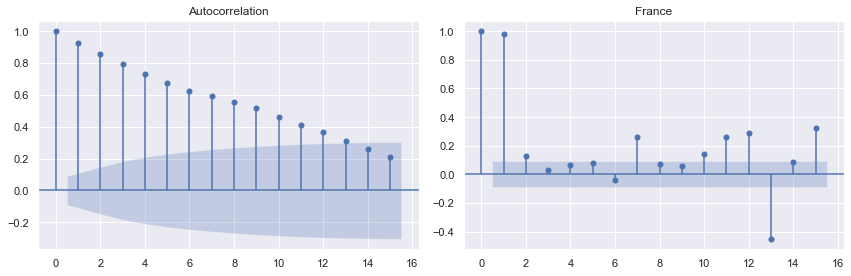

In [72]:
import statsmodels.tsa.api as smt

for country in countries: 
    fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
    fig.set_figwidth(12)
    fig.set_figheight(4)
    smt.graphics.plot_acf(final_df[final_df.Country == country]['cpi'], lags=15, ax=axes[0], alpha=0.5)
    smt.graphics.plot_pacf(final_df[final_df.Country == country]['cpi'], lags=15, ax=axes[1], alpha=0.5, method='ols')
    plt.title(country)
    plt.tight_layout()

Since, there are enough spikes in the plots outside the insignificant zone (dotted horizontal lines) we can conclude that the residuals are not random. This implies that there is juice or information available in residuals to be extracted by AR and MA models. Also, there is a seasonal component available in the residuals at the lag 12 (represented by spikes at lag 12). This makes sense since we are analyzing monthly data that tends to have seasonality of 12 months because of patterns in tractor sales.

#### Identification of best fit ARIMA model

In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. Auto arima function in forecast package in R helps us identify the best fit ARIMA model on the fly but in Python we will generate combination of p,d and q to select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model.
This technique is known as "grid search" where we iteratively explore different combinations of parameters. For each such combination of parameters, we try to fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess AIC or BIC score. The model with the best score wins and the parmeters for that model are the optimal parmeters.

In [73]:
import sys
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline


def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
            
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [74]:
#ARIMA Model with 2 months Lag Data Regressor beacause of the monthly data cadance
timeseries = final_df["cpi"]
regressors = final_df[['New_cases', 'unemp', 'gdp', 'Production']]
best_results = auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3647.02041391087
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1971.2903332415328
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1965.3453715119115
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1973.1259432965903
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3200.9814275206745
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2655.4653837590176
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2849.8014926842716
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2609.8153166696493
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2397.134177209203
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:745.4466294117382
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:731.4406357927752
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:724.9609560806884
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:788.3468275029907
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:745.0120146744027
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:734.9791560581316
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:727.2638964939215
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1504.41697372662
SARIMAX(1, 0, 0)x(0, 0, 1,

SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:724.7576946306099

The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

#### Akaike Information Criterion (AIC) 
- AIC is an effort to balance the model between goodness-of-fit and number of parameters used in the model. This is similar to the balancing act between income and cost of a company so that the debs of the company is optimized (Debt = Cost - Income). As a modeler, we care about the maximum goodness of fit (income) with the minimum number of parameters (cost).

AIC=2K−2ln(L)AIC=2K−2ln(L) 

For the given model, L in the above formula is the maximized value of the likelihood function representing goodness-of-fit, and K the number of estimated parameters. Like our debts, we want to keep AIC value at the minimum to choose the best possible model. Bayesian Information Criterion (BIC) is another variant of AIC and is used for the same purpose of best fit model selection. For the best possible model selection, we want to look at AIC, BIC, and AICc (AIC with sample correction) if all these values are minimum for a given model. With increasing parameters K will increase and hence AIC increases. While with the goodness of the fit L increases thus decreasing AIC.

As expected, our model has I (or integrated) component equal to 1. This represents differencing of order 1. There is additional differencing of lag 12 in the above best fit model. Moreover, the best fit model has MA value of order 1. Also, there is seasonal MA with lag 12 of order 1.

## Model Evaluation

In [76]:
pred_dynamic = best_results.get_prediction(full_results=True)
pred_dynamic.predicted_mean

DATE
2016-10-01     -7.430661
2016-11-01    129.627922
2016-12-01    100.453971
2017-01-01    101.431903
2017-02-01     99.804669
                 ...    
2021-01-01    104.385357
2021-02-01    104.287116
2021-03-01    103.789371
2021-04-01    105.147064
2021-05-01    105.978740
Name: predicted_mean, Length: 336, dtype: float64

In [77]:
forecast = pred_dynamic.predicted_mean
actual = final_df['2016-10-01':]['cpi']

In [78]:
MAPE = np.mean(np.abs(actual - forecast)/actual)
print('The Mean Absolute percentage error of our forecast for last two years is {}'. \
    format(round(MAPE, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0097


In [79]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 41.0156
The ROOT Mean Squared Error of our forecasts is 6.4043422769243055


# Forecast future

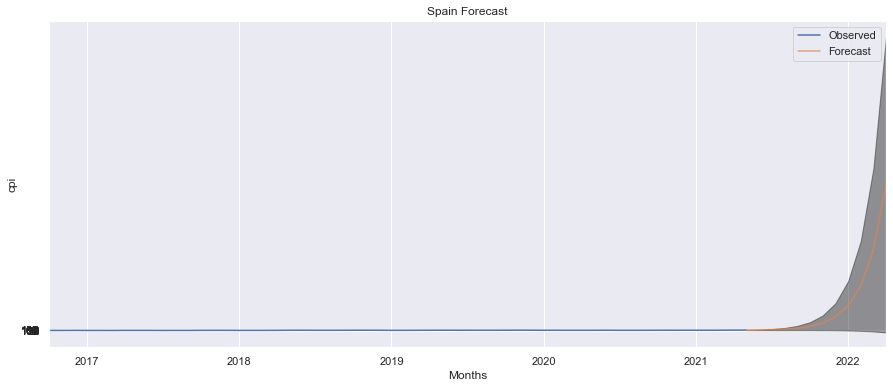

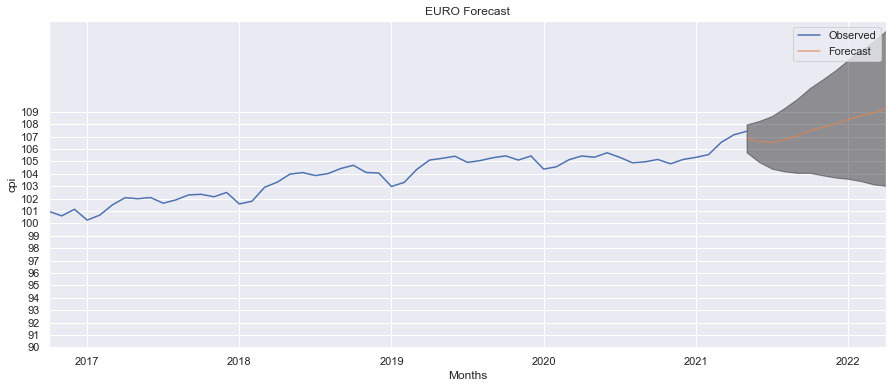

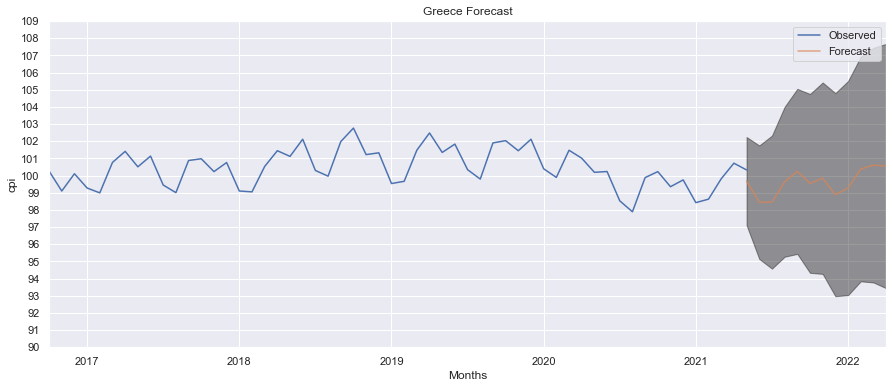

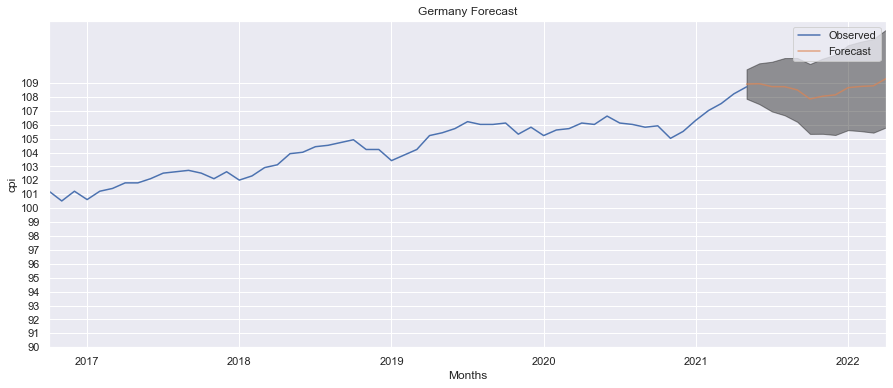

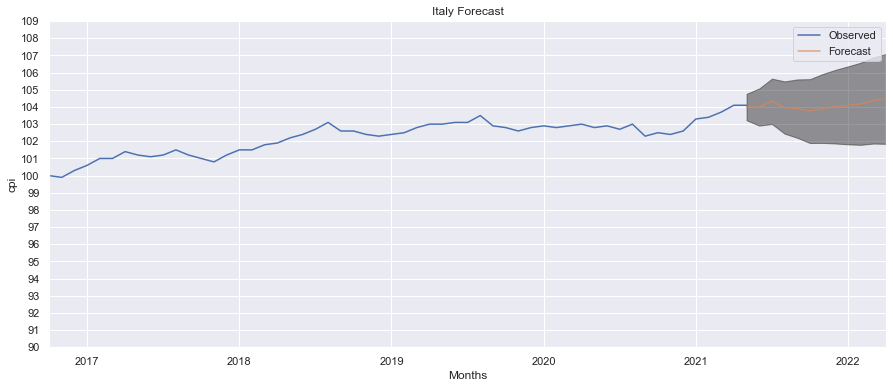

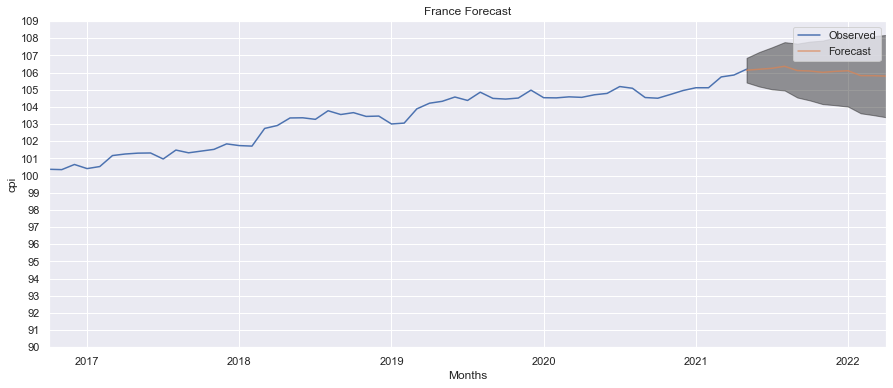

In [84]:
for country in countries:
    Future_cases = final_df[final_df.Country == country][final_df[final_df.Country == country].index > '2020-05-01']
    Future_cases = Future_cases[['New_cases', 'unemp', 'gdp', 'Production']]

    #### Step 8: Forecast  using the best fit ARIMA model

    #ARIMA Model with 2 months Lag Data Regressor beacause of the monthly data cadance
    timeseries = final_df[final_df.Country == country]["cpi"]
    regressors = final_df[final_df.Country == country][['New_cases', 'unemp', 'gdp', 'Production']]

    best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                        exog = regressors,
                                        order=(1, 1, 1),
                                        seasonal_order=(1, 0, 1, 12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
    best_results = best_model.fit()

    #The next step is to predict  for next 12 Months through the above model.

    # Get forecast 12 steps (12 Months) ahead in future
    n_steps = 12
    pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01, exog=Future_cases) # alpha=0.01 signifies 99% confidence interval
    pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05, exog=Future_cases) # alpha=0.05 95% CI

    # Get confidence intervals 95% & 99% of the forecasts
    pred_ci_99 = pred_uc_99.conf_int()
    pred_ci_95 = pred_uc_95.conf_int()

    n_steps = 12
    idx = pd.date_range(final_df[final_df.Country == country].index[-1], periods=n_steps, freq='MS')
    fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                        index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

    fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                        index=idx, columns=['lower_ci_99', 'upper_ci_99'])
    fc_all = fc_95.combine_first(fc_99)
    fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns

    # plot the forecast along with the confidence band
    axis = final_df[final_df.Country == country]['cpi'].plot(label='Observed', figsize=(15, 6))
    fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
    axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
    axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
    axis.set_xlabel('Months')
    axis.set_ylabel('cpi')
    axis.set_yticks(range(90, 110))
    plt.legend(loc='best')
    plt.title(country + " Forecast")
    plt.show()